In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
# Now we need to read in the data

df =  pd.read_csv('movies.csv')


In [73]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,387,5,0,2009,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162,29
7445,389,5,0,2019,8.4,903000,106,515,1474,47,356000000,2797501328,987,181,39
3045,4922,5,6,1997,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194,17
6663,3655,5,0,2015,7.8,876000,770,1810,357,47,245000000,2069521700,949,138,35
7244,390,5,0,2018,8.4,897000,106,515,1474,47,321000000,2048359754,987,149,38


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

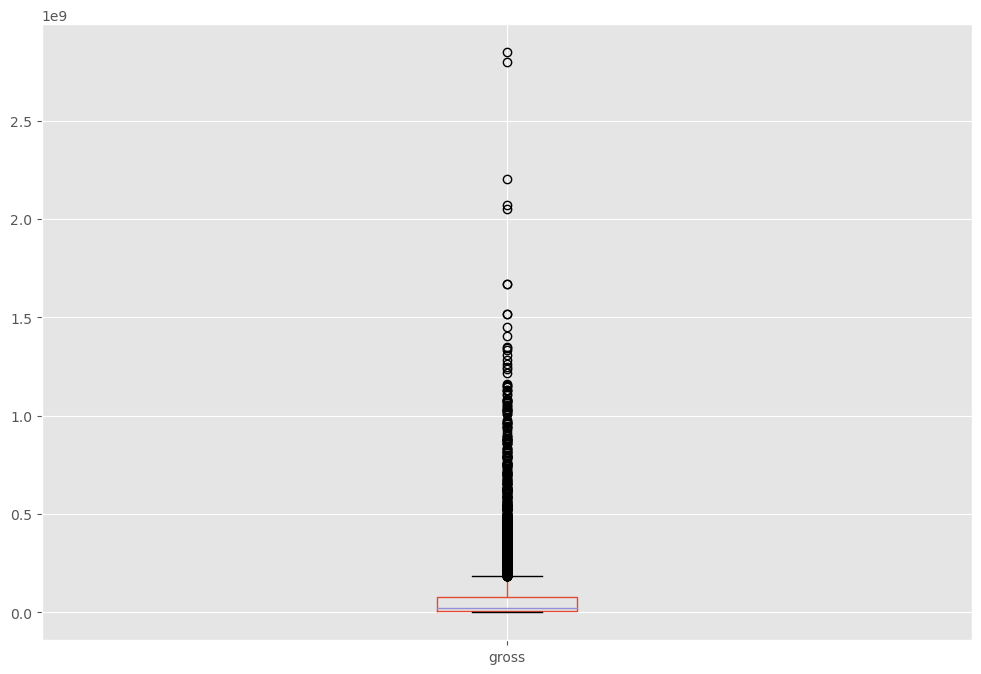

In [7]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [10]:
# Assuming the column containing the dates is named 'Date'
df['released'] = df['released'].str.split('(').str[0].str.strip()


In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [19]:
# Drop rows with missing or infinite values in 'budget', 'gross', and 'votes' columns


df.dropna(subset=['budget', 'gross', 'votes', 'runtime'], inplace=True)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['budget', 'gross', 'votes', 'runtime'], how="all")
# Change datatype to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')


In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [21]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [23]:
# create correct year column 

df = df.drop(columns=['released'])


In [24]:
df.head()


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [25]:
# sort data by gross from highest to lowest 
df = df.sort_values(by='gross', ascending=False)


In [26]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


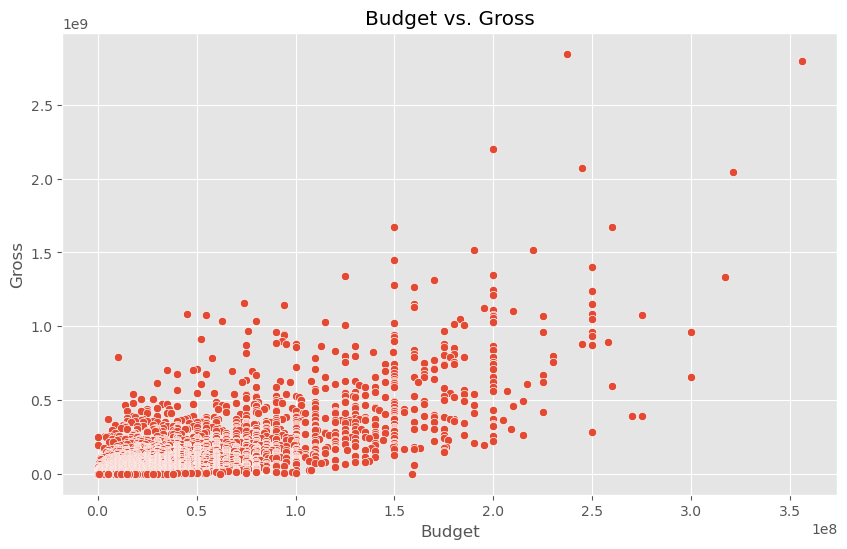

In [28]:


# Plot budget vs gross using seaborn


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs. Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


<Axes: xlabel='gross', ylabel='budget'>

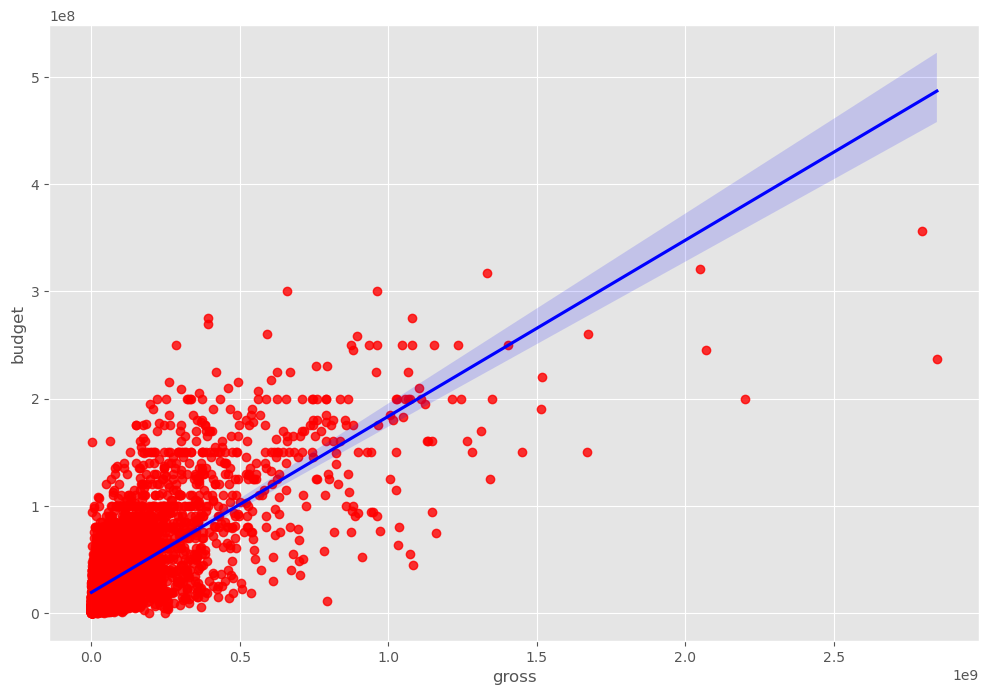

In [33]:
sns.regplot(x="gross", y="budget", data=df,  scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [35]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object


In [36]:
# Convert 'gross' column to numeric, coercing errors to NaN
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Sort DataFrame by the 'gross' column
df_sorted = df.sort_values(by='gross', ascending=False)


In [37]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [38]:
# Convert relevant columns to numeric data type


numeric_cols = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort DataFrame by the 'gross' column


df_sorted = df.sort_values(by='gross', ascending=False)


In [39]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.055391  0.205852  0.327793  0.274354  0.074203
score    0.055391  1.000000  0.473789  0.071821  0.222100  0.414580
votes    0.205852  0.473789  1.000000  0.440035  0.614895  0.352437
budget   0.327793  0.071821  0.440035  1.000000  0.740410  0.318595
gross    0.274354  0.222100  0.614895  0.740410  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000


In [44]:
correlation_matrix = numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.055391  0.205852  0.327793  0.274354  0.074203
score    0.055391  1.000000  0.473789  0.071821  0.222100  0.414580
votes    0.205852  0.473789  1.000000  0.440035  0.614895  0.352437
budget   0.327793  0.071821  0.440035  1.000000  0.740410  0.318595
gross    0.274354  0.222100  0.614895  0.740410  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000


In [45]:
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.274354,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.222100,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.614895,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.740410,0.318595
gross,0.274354,0.222100,0.614895,0.740410,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [46]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.308761,0.186244,0.266223,0.136743,0.608618,0.680284,0.763541,0.601313,0.124836,0.528461,0.986490,0.632050,0.088479
rating,0.308761,1.000000,0.031644,0.096334,-0.074245,0.119162,0.225674,0.246883,0.218168,0.108082,0.274252,0.313773,0.263241,0.028146
genre,0.186244,0.031644,1.000000,0.074533,0.049374,0.178125,0.132299,0.129670,0.143743,-0.056522,0.172872,0.184665,0.080591,0.011499
year,0.266223,0.096334,0.074533,1.000000,0.044498,0.285974,0.185090,0.229848,0.239120,-0.046673,0.189622,0.276624,0.134522,0.037425
score,0.136743,-0.074245,0.049374,0.044498,1.000000,0.248573,0.176935,0.122623,0.139260,-0.058345,-0.006436,0.140104,0.022303,0.057452
votes,0.608618,0.119162,0.178125,0.285974,0.248573,1.000000,0.473716,0.523159,0.429740,0.013576,0.318499,0.620622,0.345989,0.087905
director,0.680284,0.225674,0.132299,0.185090,0.176935,0.473716,1.000000,0.643230,0.506173,0.121948,0.444075,0.693321,0.527198,0.084431
writer,0.763541,0.246883,0.129670,0.229848,0.122623,0.523159,0.643230,1.000000,0.510587,0.138092,0.449223,0.775961,0.531149,0.066669
star,0.601313,0.218168,0.143743,0.239120,0.139260,0.429740,0.506173,0.510587,1.000000,0.107451,0.460459,0.613948,0.457455,0.095542
country,0.124836,0.108082,-0.056522,-0.046673,-0.058345,0.013576,0.121948,0.138092,0.107451,1.000000,0.114469,0.124292,0.178207,0.018585


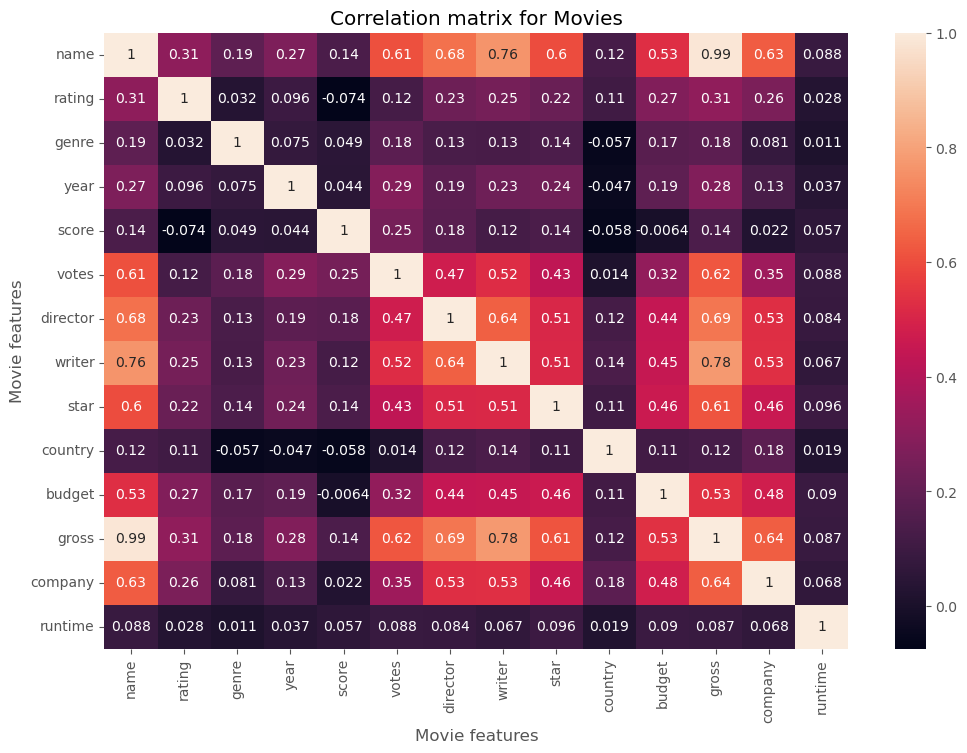

In [47]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [49]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   score     -0.074245
score    rating    -0.074245
         country   -0.058345
country  score     -0.058345
         genre     -0.056522
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64


In [50]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.506173
star      director    0.506173
writer    star        0.510587
star      writer      0.510587
writer    votes       0.523159
votes     writer      0.523159
director  company     0.527198
company   director    0.527198
budget    name        0.528461
name      budget      0.528461
company   writer      0.531149
writer    company     0.531149
budget    gross       0.534492
gross     budget      0.534492
name      star        0.601313
star      name        0.601313
name      votes       0.608618
votes     name        0.608618
star      gross       0.613948
gross     star        0.613948
          votes       0.620622
votes     gross       0.620622
company   name        0.632050
name      company     0.632050
gross     company     0.637530
company   gross       0.637530
director  writer      0.643230
writer    director    0.643230
name      director    0.680284
director  name        0.680284
gross     director    0.693321
director  gross       0.693321
writer  

In [51]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [56]:
df['Year'] = df['year'].astype(str).str[:4]
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1993
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2000
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982
2417,Madadayo,NaN,Drama,1993,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134,1993


In [57]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2997 rows x 1 columns]

In [58]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [59]:
	
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

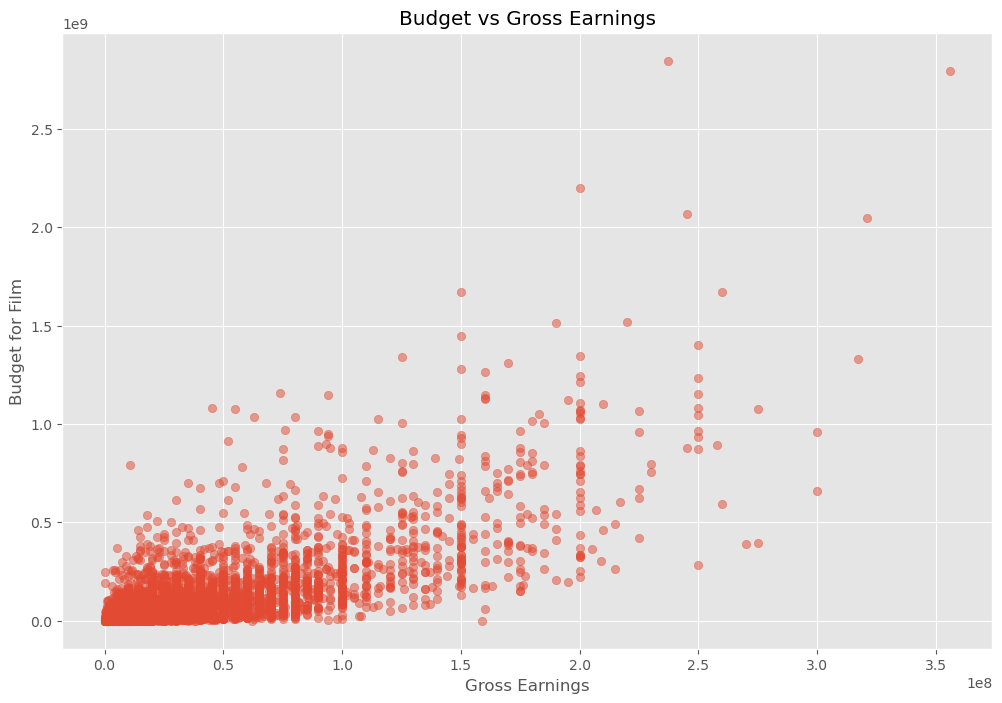

In [60]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [74]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,387,5,0,2009,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162,29
7445,389,5,0,2019,8.4,903000,106,515,1474,47,356000000,2797501328,987,181,39
3045,4922,5,6,1997,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194,17
6663,3655,5,0,2015,7.8,876000,770,1810,357,47,245000000,2069521700,949,138,35
7244,390,5,0,2018,8.4,897000,106,515,1474,47,321000000,2048359754,987,149,38


In [62]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,387,5,0,2009,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162,29
7445,389,5,0,2019,8.4,903000,106,515,1474,47,356000000,2797501328,987,181,39
3045,4922,5,6,1997,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194,17
6663,3655,5,0,2015,7.8,876000,770,1810,357,47,245000000,2069521700,949,138,35
7244,390,5,0,2018,8.4,897000,106,515,1474,47,321000000,2048359754,987,149,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2980,5,0,1993,4.5,1900,1810,3111,187,47,5000000,2970,1382,97,13
3681,1599,3,6,2000,6.8,43000,954,1687,528,6,5000000,2554,468,108,20
272,2920,6,9,1982,3.9,2300,263,55,1477,47,800000,2270,584,85,2
2417,2401,-1,6,1993,7.3,5100,23,1220,1687,26,11900000,596,492,134,13


In [72]:
# votes and budget have the highest correlation to gross earnings !!! 

# THANKS FOR LOOKING AT MY CODE 